CT475 Assignment 1
-------------


Note : as there may be variable sharing between cells run notebook sequentially if change any parameters.

-------------------

Data Pre-Processing
--------------

In [29]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

In [30]:
df = pd.read_csv('./illness.txt' , header = None).transpose()
df.head(1)

,0,1,2,3,4,5,6,7,8
0,122,64,positive,32,1,156,35.1,0.692,30


In [31]:
df.columns = ['plasmaglucose', 'bp' , 'test_result', 'skin_thickness', 'num_pregnancies', 'insulin' , 'bmi', 'pedigree', 'age']
df[['skin_thickness']] = df[['skin_thickness']].astype(float)
df[['insulin']] = df[['insulin']].astype(float)
df[['plasmaglucose']] = df[['plasmaglucose']].astype(float)
df[['bmi']] = df[['bmi']].astype(float)
df[['skin_thickness']] = df[['skin_thickness']].astype(float)
df[['num_pregnancies']] = df[['num_pregnancies']].astype(float)
df[['age']] = df[['age']].astype(float)
df[['pedigree']] = df[['pedigree']].astype(float)
df[['bp']] = df[['bp']].astype(float)
df.head(1)

,plasmaglucose,bp,test_result,skin_thickness,num_pregnancies,insulin,bmi,pedigree,age
0,122.0,64.0,positive,32.0,1.0,156.0,35.1,0.692,30.0


In [32]:
predictor = df['test_result']

In [33]:
dfEncode = df['test_result']
binaryEncoded = []
for d in dfEncode : 
    if(d == 'positive'):
        binaryEncoded.append(1)
    else : 
        binaryEncoded.append(0)
        
binaryEncodedDF = pd.DataFrame(binaryEncoded)
binaryEncodedDF.columns = ['test_result-encoded']
binaryEncodedDF.head(5)

,test_result-encoded
0,1
1,0
2,0
3,0
4,1


In [34]:
concatDF = pd.concat([df, binaryEncodedDF], axis=1)
concatDF.head(5)

,plasmaglucose,bp,test_result,skin_thickness,num_pregnancies,insulin,bmi,pedigree,age,test_result-encoded
0,122.0,64.0,positive,32.0,1.0,156.0,35.1,0.692,30.0,1
1,80.0,74.0,negative,11.0,1.0,60.0,30.0,0.527,22.0,0
2,100.0,70.0,negative,26.0,0.0,50.0,30.8,0.597,21.0,0
3,119.0,64.0,negative,18.0,0.0,92.0,34.9,0.725,23.0,0
4,162.0,76.0,positive,56.0,0.0,100.0,53.2,0.759,25.0,1


http://scikit-learn.org/stable/modules/tree.html

Define the input features/observations
----------------

In [35]:
featureNames = ['plasmaglucose','bp','skin_thickness','num_pregnancies','insulin','bmi','pedigree','age']

Convert training data to matrix representation
----------------

In [36]:
X = concatDF[featureNames].as_matrix()
Y = concatDF[['test_result-encoded']].as_matrix()

Create validation data
--------------

In [37]:
X_data, X_validation, Y_data, Y_validation = train_test_split(X, Y, test_size=0.05, random_state=0)
print(len(X_validation))

19


Create training and test data.
--------------
Same training and test sets will be used for decision tree and logistic regression


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)
print(len(X_train))
print(len(X_test))

285
72


Train a decision tree classifier.
-----------------------
Use entropy as measure of information gain., default is 'gini' .

In [39]:
decisionTreeClassifier = DecisionTreeClassifier(criterion='entropy' , random_state=0)
decisionTreeClassifier = decisionTreeClassifier.fit(X_train, Y_train)

Decision Tree Training Set accuracy
-----------

In [40]:
testPredict = []
for xt in X_train:
    testPredict.append(decisionTreeClassifier.predict([xt]))
 
print(metrics.accuracy_score(Y_train , testPredict) * 100 , "%") 

100.0 %


Decision Tree Test Set accuracy
-----------

In [41]:
testPredict = []
for xt in X_test:
    testPredict.append(decisionTreeClassifier.predict([xt]))
 
print(metrics.accuracy_score(Y_test , testPredict) * 100 , "%") 

69.4444444444 %


Decision Tree Validation Set accuracy
-----------

In [42]:
testPredict = []
for xt in X_validation:
    testPredict.append(decisionTreeClassifier.predict([xt]))
 
print(metrics.accuracy_score(Y_validation , testPredict) * 100 , "%") 

63.1578947368 %


Decision tree 10 fold cross validation. 
-------------

cv parameter controls number of folds.

In [43]:
scores = cross_val_score(decisionTreeClassifier, X_test, Y_test.ravel(), cv=10, scoring='f1_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.66666667  0.56363636  0.56363636  0.84444444  0.65        0.41666667
  0.36363636  1.          0.65        0.66666667]
Accuracy: 0.64 (+/- 0.35)


Decision tree manual test 1
--------------
In order to test logic of decision tree branches find observations where insulin <= 95.5 and plasmaglucose <= 106.0. Find observations that are negative : test_result-encoded = 0 . Generated decision tree can be followed with this logic to find negative test result.

In [44]:
concatDF[(concatDF['insulin'] <= 95.5) & (concatDF['plasmaglucose'] <= 106.0)].head(5)

,plasmaglucose,bp,test_result,skin_thickness,num_pregnancies,insulin,bmi,pedigree,age,test_result-encoded
1,80.0,74.0,negative,11.0,1.0,60.0,30.0,0.527,22.0,0
2,100.0,70.0,negative,26.0,0.0,50.0,30.8,0.597,21.0,0
5,90.0,62.0,negative,18.0,1.0,59.0,25.1,1.268,25.0,0
7,87.0,78.0,negative,27.0,1.0,32.0,34.6,0.101,22.0,0
8,74.0,68.0,negative,28.0,3.0,45.0,29.7,0.293,23.0,0


Decision tree manual test 2
--------------

In order to test logic of decision tree branches find observations where 'insulin' > 95.5 & 'skin_thickness' > 17.5 & 'plasmaglucose' > 155 & pedigree > 1.759 .
Find observations that are positive : test_result-encoded = 1 . There is also a negative case found , does this suggest there is no information gain for this node ? Generated decision tree can be followed with this logic to find positive test result.

In [45]:
concatDF[(concatDF['insulin'] > 95.5) & (concatDF['skin_thickness'] > 17.5) & (concatDF['plasmaglucose'] > 155) 
         & (concatDF['pedigree'] > 1.759 )]


,plasmaglucose,bp,test_result,skin_thickness,num_pregnancies,insulin,bmi,pedigree,age,test_result-encoded
65,173.0,82.0,positive,48.0,3.0,465.0,38.4,2.137,25.0,1
105,197.0,70.0,negative,39.0,4.0,744.0,36.7,2.329,31.0,0


Decision Tree - node visualisaton
-----------------

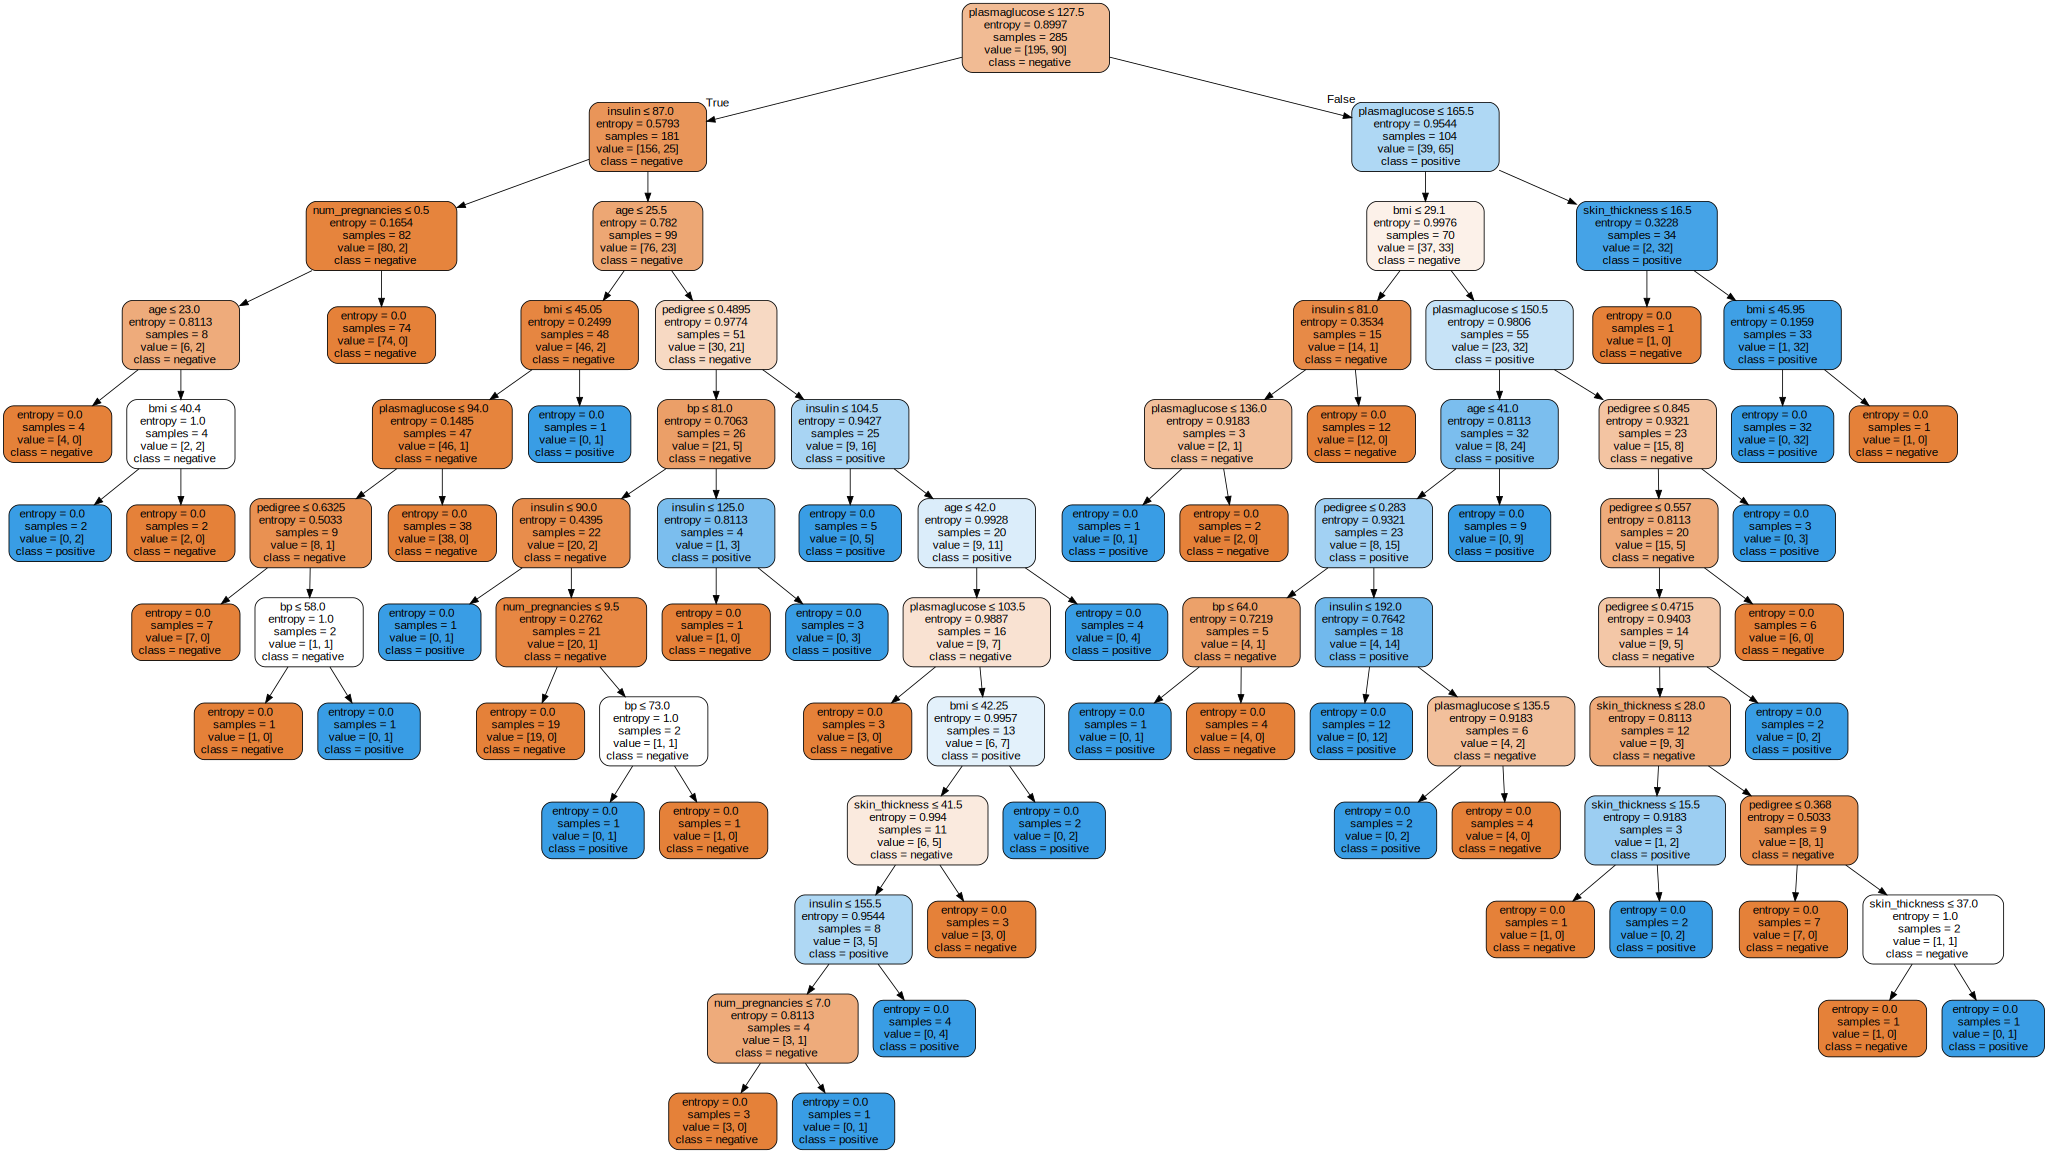

In [46]:
dot_data = export_graphviz(decisionTreeClassifier, out_file=None, 
                         feature_names=featureNames,  
                         
                           class_names=['negative', 'positive'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Decision Tree - Text visualization
-----------------
Based on generic code supplied by : 

http://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree


In [47]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 12)

In [48]:
tree_to_code(decisionTreeClassifier, list(featureNames))

def tree(plasmaglucose, bp, skin_thickness, num_pregnancies, insulin, bmi, pedigree, age):
                        if plasmaglucose <= 127.5:
                          if insulin <= 87.0:
                            if num_pregnancies <= 0.5:
                              if age <= 23.0:
                                return [[ 4.  0.]]
                              else:  # if age > 23.0
                                if bmi <= 40.400001525878906:
                                  return [[ 0.  2.]]
                                else:  # if bmi > 40.400001525878906
                                  return [[ 2.  0.]]
                            else:  # if num_pregnancies > 0.5
                              return [[ 74.   0.]]
                          else:  # if insulin > 87.0
                            if age <= 25.5:
                              if bmi <= 45.04999923706055:
                                if plasmaglucose <= 94.0:
                                  if pedigr

-------------------------------
Logistic Regression
-------------------------------
-------------------------------

In [49]:
logistic = linear_model.LogisticRegression(C=1e5 , random_state=0)
logistic.fit(X_train, Y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Iteratively test the value of predition, add test result to array. 

Logistic Regression Train Set accuracy
-----------

In [50]:
testPredict = []
for xt in X_train:
    testPredict.append(logistic.predict([xt]))
 
print(metrics.accuracy_score(Y_train , testPredict) * 100 , "%") 

81.0526315789 %


Logistic Regression Test Set accuracy
-----------

In [51]:
testPredict = []
for xt in X_test:
    testPredict.append(logistic.predict([xt]))
 
print(metrics.accuracy_score(Y_test , testPredict) * 100 , "%") 

75.0 %


Logistic Regression Validation Set accuracy
-----------

In [52]:
testPredict = []
for xt in X_validation:
    testPredict.append(logistic.predict([xt]))
 
print(metrics.accuracy_score(Y_validation , testPredict) * 100 , "%") 

84.2105263158 %


Logistic Regression 10 fold cross validation. 
-----------

cv parameter in function cross_val_score controls number of folds.

In [53]:
scores = cross_val_score(logistic, X_test, Y_test.ravel(), cv=10, scoring='f1_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.85454545  0.66666667  0.85454545  0.53333333  0.65        0.65        0.65
  0.41666667  0.84444444  0.66666667]
Accuracy: 0.68 (+/- 0.27)


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Assignment End
--------------------

__________________________________________________________________________________________________________________

TODO
-----------

Fix warnings.

Replace iteration with functional invocations where appropriate.
